In [3]:
import pandas as pd
import io

# Read the uploaded Excel file into a DataFrame
# Read the CSV file back into a DataFrame. It is Cleaned Dataset
grouped_new_read = pd.read_csv('Grouped_Subject_Description.csv')

# Display the DataFrame
grouped_new_read.head(20)

,Year,Subject,SubjectLongForm,Grouped_Subject_Description,NoOfClasses
0,2020,AAP,"Architecture, Art, and Plannin",EmptyString,1
1,2021,AAP,"Architecture, Art, and Plannin",EmptyString,1
2,2023,AAP,"Architecture, Art, and Plannin",topics tba create justice worlds examine struc...,2
3,2014,AAS,Asian American Studies,introductory history chinese japanese asian in...,4
4,2015,AAS,Asian American Studies,course examine historical contemporary issue a...,13
5,2016,AAS,Asian American Studies,course examine historical contemporary issue a...,14
6,2017,AAS,Asian American Studies,course examine historical contemporary issue a...,9
7,2018,AAS,Asian American Studies,course introduce student historical contempora...,10
8,2019,AAS,Asian American Studies,interdisciplinary course offer introduction st...,15
9,2020,AAS,Asian American Studies,interdisciplinary course offer introduction st...,12


In [5]:
# Function to count occurrences of business-related words
#This is the BruteForce approach

business_keywords = {'business', 'startup', 'entrepreneurship', 'entrepreneur', 'venture', 'market', 'investment', 'company'}

def count_business_words(description):
    """
    This function returns the count of business related words

    Args: text to be analysed

    Returns: Returns count of business related words
        type: int
    """
    # Tokenize the description into words
    words = description.split()
    count = len(words)
    # Count how many words are in the business_keywords set
    business_related_words = sum(word.lower() in business_keywords for word in words)
    percentageOfBusinessWords = (business_related_words/count)*100
    return count, business_related_words, round(percentageOfBusinessWords,2)

In [6]:
data = grouped_new_read['Grouped_Subject_Description'].apply(count_business_words)

totalCount = [item[0] for item in data]
businessCount = [item[1] for item in data]
percentageOfBusiness = [item[2] for item in data]

# Assign the cleaned texts and word counts to their respective columns
grouped_new_read['TotalWords'] = totalCount
grouped_new_read['businessCount'] = businessCount
grouped_new_read['%OfBusinessWords'] = percentageOfBusiness

grouped_new_read.head(20)

,Year,Subject,SubjectLongForm,Grouped_Subject_Description,NoOfClasses,TotalWords,businessCount,%OfBusinessWords
0,2020,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.00
1,2021,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.00
2,2023,AAP,"Architecture, Art, and Plannin",topics tba create justice worlds examine struc...,2,17,0,0.00
3,2014,AAS,Asian American Studies,introductory history chinese japanese asian in...,4,162,0,0.00
4,2015,AAS,Asian American Studies,course examine historical contemporary issue a...,13,605,0,0.00
5,2016,AAS,Asian American Studies,course examine historical contemporary issue a...,14,666,1,0.15
6,2017,AAS,Asian American Studies,course examine historical contemporary issue a...,9,539,0,0.00
7,2018,AAS,Asian American Studies,course introduce student historical contempora...,10,491,0,0.00
8,2019,AAS,Asian American Studies,interdisciplinary course offer introduction st...,15,874,0,0.00
9,2020,AAS,Asian American Studies,interdisciplinary course offer introduction st...,12,662,0,0.00


In [7]:
!pip install keybert

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
# We can also use the model paraphrase-MiniLM-L6-v2

from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')  # This is the default model used by KeyBERT
kw_model = KeyBERT(model=sentence_model)    #Sentence transformer is based on Hugging face transformer

In [7]:
# Extract keywords using BERT model
def extract_keywords_and_update_count(text):
    """
    Function to extract keywords using KeyBERT model

    Args: text to the model

    Returns: Keywords along with cosine similarity wrt document
        type: list of tuples
    """
    keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english',top_n=50, diversity=0.4)  #we can add use_mmr = True and diversity = 0.7
    return keywords

In [8]:
candidate_keywords = [
    "marketing", "finance", "investment", "startup",
    "entrepreneurship", "management", "corporate", "economics",
    "venture capital", "market analysis", "business development",
    "commercialization", "innovation", "strategic planning"
]


['marketing', 'finance', 'investment', 'startup', 'entrepreneurship', 'management', 'corporate', 'economics', 'venture capital', 'market analysis', 'business development', 'commercialization', 'innovation', 'strategic planning']
<class 'list'>


In [9]:
from transformers import BertModel, BertTokenizer
import torch

In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [11]:
#Function to get words embeddings intensor format
def get_word_embedding(word, tokenizer, model):
    """
    Function to get word embedding using a specified tokenizer and model

    Args:
    word (str): The word for which the embedding is to be obtained.
    tokenizer: The tokenizer to be used for tokenizing the input word. This should be compatible with the model being used.
    model: The pre-trained model to be used for obtaining the word embeddings. This model should be compatible with the tokenizer.

    Returns:
    torch.Tensor: The mean of the last hidden state of the model's output, representing the word embedding.
    """
    inputs = tokenizer(word, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

In [12]:
#Function to return the word embeddings for candidate keywords
def get_batch_embeddings(words, tokenizer, model, batch_size=32):
    """
    Function to return word embeddings for a list of candidate keywords in batches

    Args:
    words (list of str): A list of words or phrases for which embeddings are to be obtained.
    tokenizer: The tokenizer to be used for tokenizing the input words.
    model: The pre-trained model to be used for obtaining word embeddings.
    batch_size (int, optional): The size of each batch for processing the words. Defaults to 32.

    Returns:
    list of torch.Tensor: A list containing the embeddings for each word or phrase in the input list.
    """
    # Process words in batches
    embeddings = []
    for i in range(0, len(words), batch_size):
        batch = words[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors='pt', max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)
        embeddings.extend(batch_embeddings)
    return embeddings

In [13]:
# Precompute embeddings for candidate keywords
candidate_embeddings = get_batch_embeddings(candidate_keywords, tokenizer, model)

In [14]:
from scipy.spatial.distance import cosine

def cosine_similarity(vec1, vec2):
    """
    Function to calculate the cosine similarity between two vectors

    Args:
    vec1 (array-like): The first vector. It can be a list, numpy array, or any array-like structure that represents a vector.
    vec2 (array-like): The second vector. It should be of the same length as vec1.

    Returns:
    float: The cosine similarity between vec1 and vec2.

    """
    return 1 - cosine(vec1, vec2)

In [15]:
#Function calculates similarity usign Cosine similarity
def calculate_similarity(keywords):
    """
    Function to calculate the number of keywords that have a high similarity with a set of candidate embeddings

    Args:
    keywords (list of tuples): A list where each tuple contains a keyword (str).


    Returns:
    int: The count of keywords whose embeddings have a cosine similarity of 0.85 or higher.

    """
    count=0   
    for keyword in keywords:
        keyword_vec = get_word_embedding(keyword[0], tokenizer, model)
        for business_word_vec in candidate_embeddings:
            similarity = cosine_similarity(keyword_vec, business_word_vec)
            if similarity>=0.85:
                count+=1
    return count

In [16]:
def get_business_related_words_keyBERT(text):
    """
    Function to extract business-related keywords from a given text using the KeyBERT model

    Args:
    text (str): The text from which business-related keywords are to be extracted.

    Global Dependencies:
    extract_keywords_and_update_count: A globally accessible function that takes a text string as input and returns extracted keywords

    Returns:
    list: A list of extracted keywords from the given text.

    """
    keywords = extract_keywords_and_update_count(text)
    return keywords

In [27]:
data = grouped_new_read['Grouped_Subject_Description'].apply(get_business_related_words_keyBERT)
grouped_new_read['KeyBERTCount'] = data
grouped_new_read.to_csv('filename2.csv', index=False)

In [28]:
import pandas as pd
import io
import ast  # Import the ast module

# Read the CSV file back into a DataFrame. It is Cleaned Dataset
final_df = pd.read_csv('filename2.csv')

# Display the DataFrame
final_df.head(20)
# Convert the 'KeyBERTCount' column from string to list of tuples
final_df['KeyBERTCount'] = final_df['KeyBERTCount'].apply(ast.literal_eval)

# Now the 'KeyBERTCount' column should contain lists of tuples

In [30]:
final_df.head()

,Year,Subject,SubjectLongForm,Grouped_Subject_Description,NoOfClasses,TotalWords,businessCount,%OfBusinessWords,KeyBERTCount
0,2020,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.0,"[(emptystring, 1.0)]"
1,2021,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.0,"[(emptystring, 1.0)]"
2,2023,AAP,"Architecture, Art, and Plannin",topics tba create justice worlds examine struc...,2,17,0,0.0,"[(racism colonialism, 0.6464), (colonialism in..."
3,2014,AAS,Asian American Studies,introductory history chinese japanese asian in...,4,162,0,0.0,"[(experience asian, 0.5937), (asians ethnic, 0..."
4,2015,AAS,Asian American Studies,course examine historical contemporary issue a...,13,605,0,0.0,"[(asian diaspora, 0.5081), (issue asian, 0.458..."


In [42]:
def process_element(keywords):
    count = calculate_similarity(keywords)
    return count

In [43]:
countOfWords = final_df['KeyBERTCount'].apply(calculate_similarity)

In [45]:
final_df['KeyBERTBusiness'] = countOfWords


In [46]:
final_df.tail()

,Year,Subject,SubjectLongForm,Grouped_Subject_Description,NoOfClasses,TotalWords,businessCount,%OfBusinessWords,KeyBERTCount,KeyBERTBusiness
2017,2020,ZULU,Zulu,isizulu widely speak language southern african...,6,223,0,0.0,"[(zulu speak, 0.532), (africa semester, 0.5249...",0
2018,2021,ZULU,Zulu,isizulu widely speak language southern african...,6,230,0,0.0,"[(zulu speak, 0.5798), (zulu language, 0.5505)...",0
2019,2022,ZULU,Zulu,development communication skill dialogue role ...,6,171,0,0.0,"[(conversational isizulu, 0.4752), (zulu cultu...",0
2020,2023,ZULU,Zulu,development communication skill dialogue role ...,6,171,0,0.0,"[(conversational isizulu, 0.4752), (zulu cultu...",0
2021,2024,ZULU,Zulu,development communication skill dialogue role ...,3,79,0,0.0,"[(literature student, 0.5377), (development co...",7


In [47]:
# Save it to .csv file for future use
final_df.to_csv('FinalBusiness.csv', index=False)

In [48]:
final_df.head()

,Year,Subject,SubjectLongForm,Grouped_Subject_Description,NoOfClasses,TotalWords,businessCount,%OfBusinessWords,KeyBERTCount,KeyBERTBusiness
0,2020,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.0,"[(emptystring, 1.0)]",0
1,2021,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.0,"[(emptystring, 1.0)]",0
2,2023,AAP,"Architecture, Art, and Plannin",topics tba create justice worlds examine struc...,2,17,0,0.0,"[(racism colonialism, 0.6464), (colonialism in...",1
3,2014,AAS,Asian American Studies,introductory history chinese japanese asian in...,4,162,0,0.0,"[(experience asian, 0.5937), (asians ethnic, 0...",1
4,2015,AAS,Asian American Studies,course examine historical contemporary issue a...,13,605,0,0.0,"[(asian diaspora, 0.5081), (issue asian, 0.458...",1


# Analysis for Business related words

In [49]:
final_df.drop(columns=['KeyBERTCount'], inplace=True)


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

final_df_analyis_business = pd.read_csv('FinalBusiness.csv')

# Line Chart for Business related word count over time at Cornell:

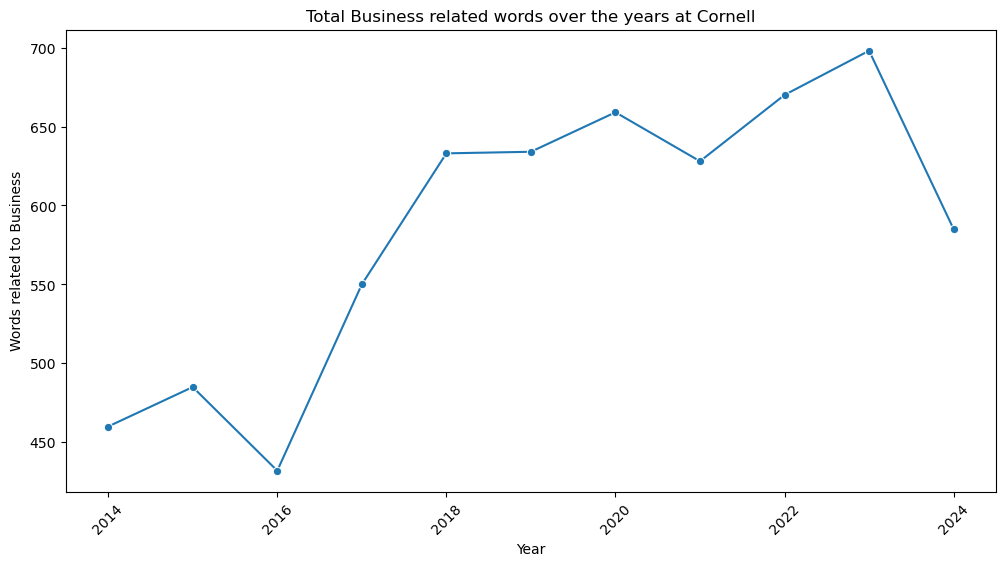

In [34]:
# Group data by Year and calculate the total KeyBERTCountFinal
total_counts_over_time = final_df_analyis_business.groupby('Year')['KeyBERTBusiness'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='KeyBERTBusiness', data=total_counts_over_time, marker='o')
plt.title('Total Business related words over the years at Cornell')
plt.xlabel('Year')
plt.ylabel('Words related to Business')
plt.xticks(rotation=45)
plt.show()

# Total count of words by Descipline

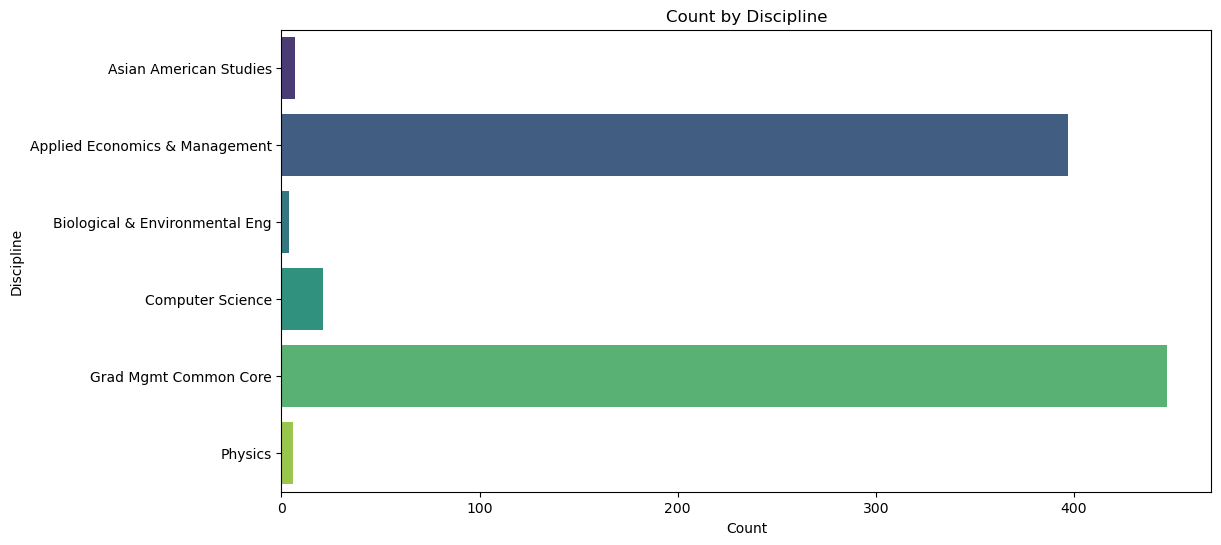

In [55]:
# Define custom aggregation functions for the columns you want to include
agg_funcs = {
    'SubjectLongForm': 'first',  # Keep the first value of SubjectLongForm
    'Grouped_Subject_Description': 'first',  # Keep the first value of Grouped_Subject_Description
    'TotalWords': 'sum',  # Sum the TotalWords for each group
    'businessCount': 'sum',  # Sum the businessCount for each group
    '%OfBusinessWords': 'mean',  # Calculate the mean of %OfBusinessWords for each group
    'KeyBERTBusiness': 'sum',  # Sum the KeyBERTCountFinal for each group
}
# Group data by Subject and apply custom aggregation functions
grouped_data = final_df_analyis_business.groupby('Subject').agg(agg_funcs).reset_index()
# List of disciplines you want to include in the graph
selected_disciplines = ['AEM', 'AAS', 'BEE', 'CS', 'NCC', 'PHYS']

# Filter the DataFrame to include only selected disciplines
filtered_data = grouped_data[grouped_data['Subject'].isin(selected_disciplines)]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='KeyBERTBusiness', y='SubjectLongForm', data=filtered_data, palette='viridis')
plt.title('Count by Discipline')
plt.xlabel('Count')
plt.ylabel('Discipline')
plt.show()

# Heatmap for Keyword Count Over Time by Business Discipline

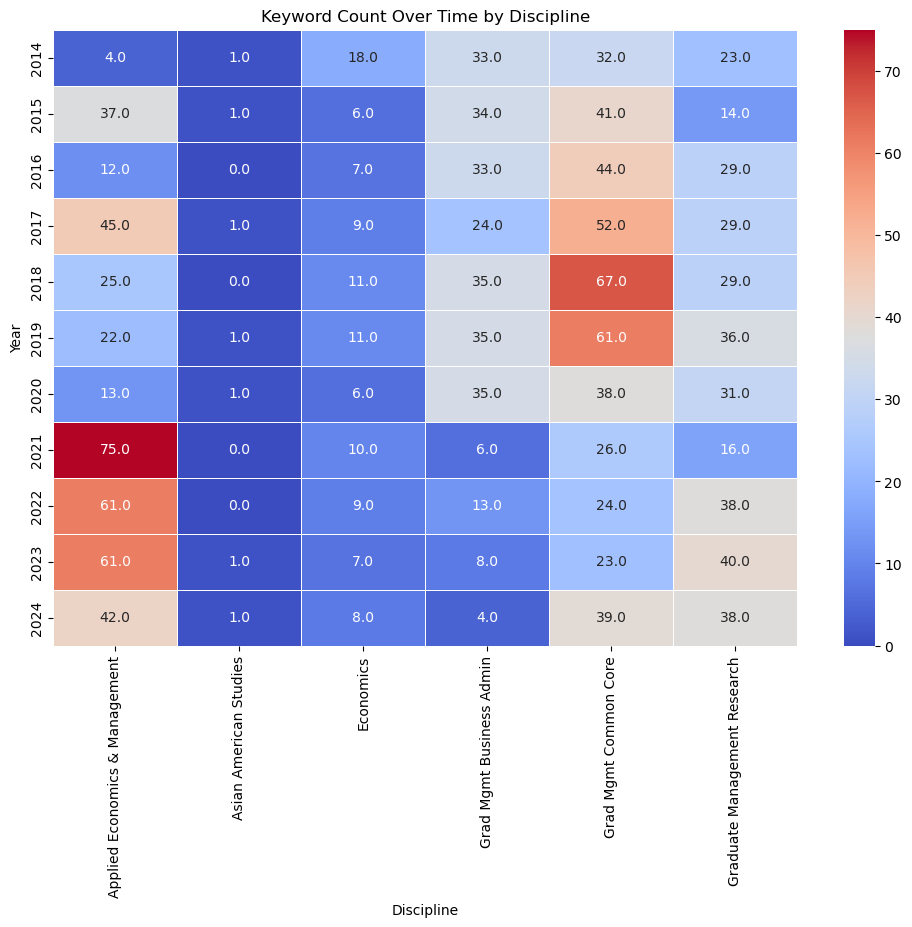

In [36]:

selected_subjects = ['AEM', 'ECON', 'NCC', 'NBA','NRE','AAS']

# Filter the DataFrame to include only selected disciplines
filtered_df = final_df_analyis_business[final_df_analyis_business['Subject'].isin(selected_subjects)]
# Pivot the filtered data to create a heatmap
heatmap_data = filtered_df.pivot_table(index='Year', columns='SubjectLongForm', values='KeyBERTBusiness', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Keyword Count Over Time by Discipline')
plt.xlabel('Discipline')
plt.ylabel('Year')
plt.show()

# Line Graph for Business keywords count for Descipline over time

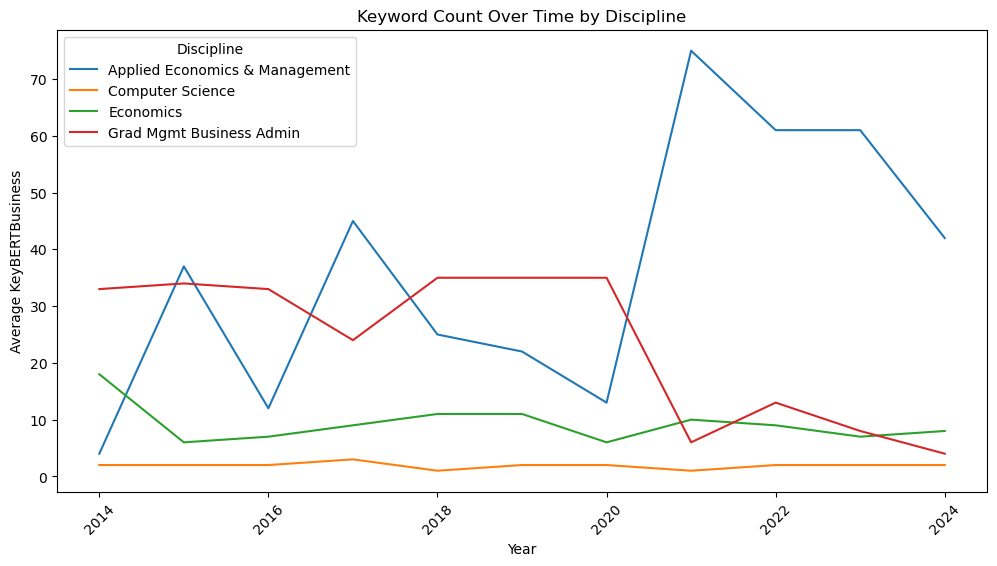

In [94]:
# List of specific disciplines you want to include
selected_disciplines = ['Computer Science','Applied Economics & Management','Economics','Grad Mgmt Business Admin']

# Filter the DataFrame to include only specific disciplines
avg_counts_by_discipline = final_df_analyis_business[final_df_analyis_business['SubjectLongForm'].isin(selected_disciplines)]

#Create a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='KeyBERTBusiness', hue='SubjectLongForm', data=avg_counts_by_discipline)
plt.title('Keyword Count Over Time by Discipline')
plt.xlabel('Year')
plt.ylabel('Average KeyBERTBusiness')
plt.xticks(rotation=45)
plt.legend(title='Discipline')
plt.show()


#  Line Graph for Business keywords count for Descipline over time (Added the NoOfClasses to get the actual analysis)

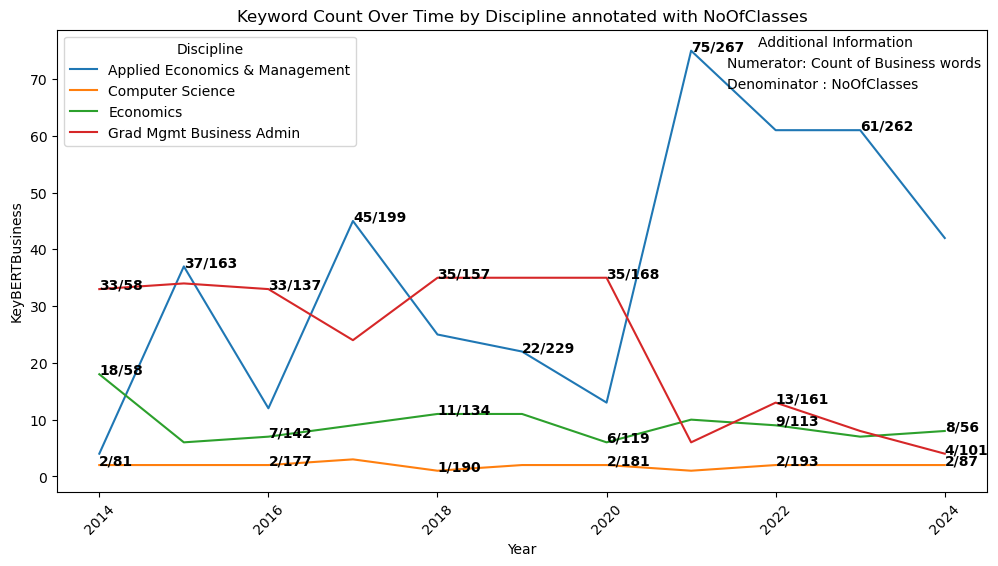

In [110]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='KeyBERTBusiness', hue='SubjectLongForm', data=avg_counts_by_discipline)

# Annotate points
for i, row in avg_counts_by_discipline.iterrows():
    if i%2==1:
        plt.text(row['Year'], row['KeyBERTBusiness'], f"{row['KeyBERTBusiness']}/{row['NoOfClasses']}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Keyword Count Over Time by Discipline annotated with NoOfClasses')
plt.xlabel('Year')
plt.ylabel('KeyBERTBusiness')
plt.xticks(rotation=45)
original_legend  = plt.legend(title='Discipline',loc='upper left')
# Create custom legend entries
custom_entry1 = mpatches.Patch(color='none', label='Numerator: Count of Business words')
custom_entry2 = mpatches.Patch(color='none', label='Denominator : NoOfClasses')

# Create custom legend
custom_legend = plt.legend(handles=[custom_entry1, custom_entry2], 
                           loc='upper right', 
                           title='Additional Information', 
                           borderaxespad=0, 
                           frameon=False)

# Add the custom legend to the plot
plt.gca().add_artist(original_legend)
plt.show()

# Bubble Chart to analysize the 3 dimensions of Data 

## Dimension 1 : Group by Subject & Year

## Dimension 2 : Count of Business related words  (Size of Bubble)


## Dimension 3 : No of Classes (Color of Bubble)


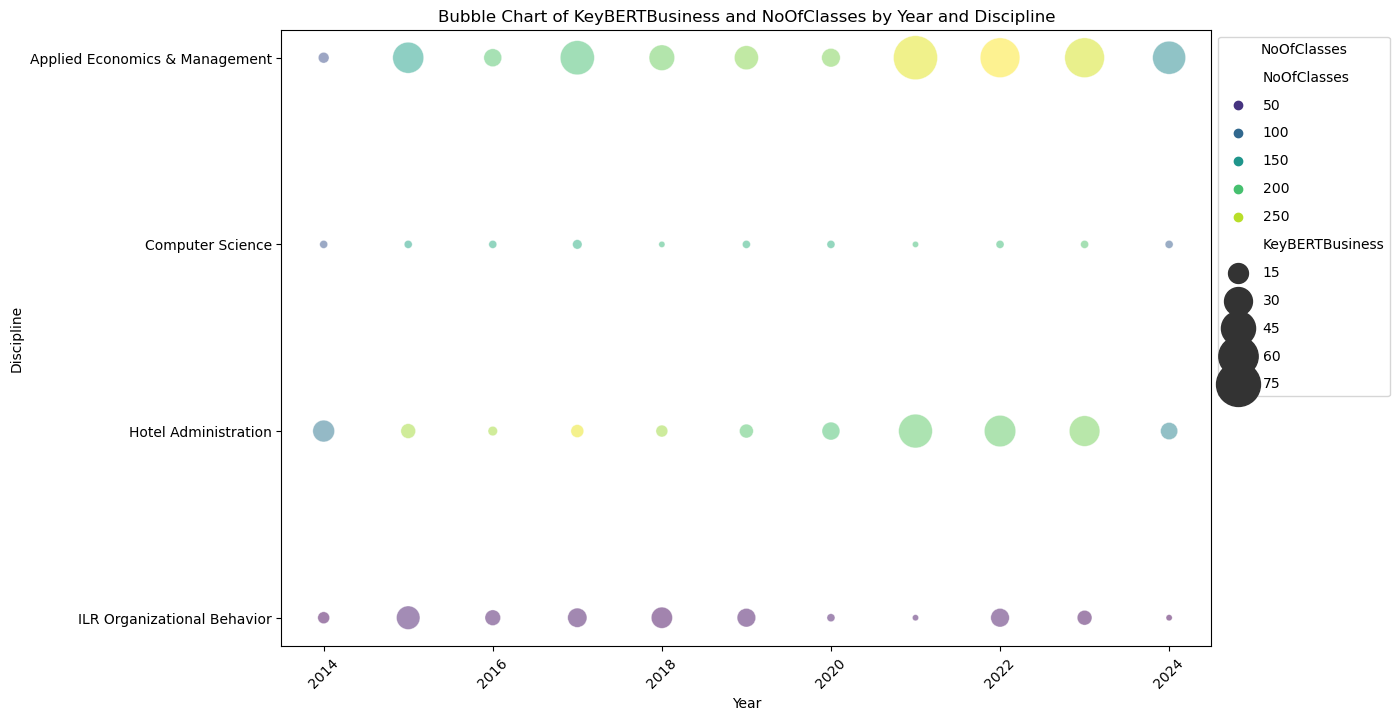

In [133]:
# Grouping and aggregating the data
bubble_data = avg_counts_by_discipline.groupby(['Year', 'SubjectLongForm']).agg({'KeyBERTBusiness': 'sum', 'NoOfClasses': 'sum'}).reset_index()

# Creating the bubble chart
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(data=bubble_data, x='Year', y='SubjectLongForm', size='KeyBERTBusiness', hue='NoOfClasses', sizes=(20, 1000), alpha=0.5, palette='viridis')

# Adding titles and labels
plt.title('Bubble Chart of KeyBERTBusiness and NoOfClasses by Year and Discipline')
plt.xlabel('Year')
plt.ylabel('Discipline')
plt.xticks(rotation=45)
bubble_plot.legend(title='NoOfClasses', labelspacing=1, bbox_to_anchor=(1, 1))
plt.show()


In [134]:
import pandas as pd
import ast

In [135]:
ethics_df = pd.read_csv('FinalBusiness.csv')
ethics_df['KeyBERTCount'] = ethics_df['KeyBERTCount'].apply(ast.literal_eval)


In [136]:
ethics_df.head()

,Year,Subject,SubjectLongForm,Grouped_Subject_Description,NoOfClasses,TotalWords,businessCount,%OfBusinessWords,KeyBERTCount,KeyBERTBusiness
0,2020,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.0,"[(emptystring, 1.0)]",0
1,2021,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.0,"[(emptystring, 1.0)]",0
2,2023,AAP,"Architecture, Art, and Plannin",topics tba create justice worlds examine struc...,2,17,0,0.0,"[(racism colonialism, 0.6464), (colonialism in...",1
3,2014,AAS,Asian American Studies,introductory history chinese japanese asian in...,4,162,0,0.0,"[(experience asian, 0.5937), (asians ethnic, 0...",1
4,2015,AAS,Asian American Studies,course examine historical contemporary issue a...,13,605,0,0.0,"[(asian diaspora, 0.5081), (issue asian, 0.458...",1


In [137]:
ethics_candidate_keywords = [
    "Ethical Sustainable Design", "Safety Risk Management", "Professional Responsibility",
    "Animal Research Ethics","Human Movement Analysis Ethics", "Robotics Ethics", "Prosthetics Ethics",
    "Research Data Management", "Research supervision", "Intellectual Property Rights", "Ethical Dilemma Dual Use Research",
    "Doctor-Patient Relationship", "Clinical Trial Ethics", "Bioethics","Biomedicine","Patient Consent", "Healthcare Equity", "Deontological Ethics",
    "Legal Professional Ethics", "Justice and Fairness in Law", "Client Confidentiality"
]

In [138]:
ethics_candidate_embeddings = get_batch_embeddings(ethics_candidate_keywords, tokenizer, model)


In [139]:
#Function calculates similarity usign Cosine similarity
def calculate_similarity_ethics(keywords):
    """
    Function to calculate the number of keywords that have a high similarity with a set of candidate embeddings

    Args:
    keywords (list of tuples): A list where each tuple contains a keyword (str).


    Returns:
    int: The count of keywords whose embeddings have a cosine similarity of 0.85 or higher.

    """
    count=0   
    for keyword in keywords:
        keyword_vec = get_word_embedding(keyword[0], tokenizer, model)
        for ethics_word_vec in ethics_candidate_embeddings:
            similarity = cosine_similarity(keyword_vec, ethics_word_vec)
            if similarity>=0.8:
                count+=1
    return count

In [140]:
countOfWordsEthics = ethics_df['KeyBERTCount'].apply(calculate_similarity_ethics)

In [142]:
ethics_df['KeyBERTEthics'] = countOfWordsEthics


In [143]:
ethics_df.to_csv('FinalEthics.csv', index=False)

# Analysis for Ethics related words

In [154]:
final_df_analyis_ethics = pd.read_csv('FinalEthics.csv')

In [155]:
#Check whetherimported properly
final_df_analyis_ethics.head()

,Year,Subject,SubjectLongForm,Grouped_Subject_Description,NoOfClasses,TotalWords,businessCount,%OfBusinessWords,KeyBERTCount,KeyBERTBusiness,KeyBERTEthics
0,2020,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.0,"[('emptystring', 1.0)]",0,0
1,2021,AAP,"Architecture, Art, and Plannin",EmptyString,1,1,0,0.0,"[('emptystring', 1.0)]",0,0
2,2023,AAP,"Architecture, Art, and Plannin",topics tba create justice worlds examine struc...,2,17,0,0.0,"[('racism colonialism', 0.6464), ('colonialism...",1,0
3,2014,AAS,Asian American Studies,introductory history chinese japanese asian in...,4,162,0,0.0,"[('experience asian', 0.5937), ('asians ethnic...",1,0
4,2015,AAS,Asian American Studies,course examine historical contemporary issue a...,13,605,0,0.0,"[('asian diaspora', 0.5081), ('issue asian', 0...",1,0


In [156]:
top5_keybert_ethics = final_df_analyis_ethics.sort_values('KeyBERTEthics', ascending=False).head(5)

In [157]:
top5_keybert_ethics.head()

,Year,Subject,SubjectLongForm,Grouped_Subject_Description,NoOfClasses,TotalWords,businessCount,%OfBusinessWords,KeyBERTCount,KeyBERTBusiness,KeyBERTEthics
358,2016,BSOC,Biology & Society,today rapidly change world health medicine com...,27,1804,2,0.11,"[('demand biomedicine', 0.4887), ('medical soc...",2,15
1731,2016,STS,Science & Technology Studies,woman minority student drop stem science techn...,63,3365,4,0.12,"[('demand biomedicine', 0.4682), ('medical soc...",2,14
960,2015,ILROB,ILR Organizational Behavior,introductory survey course theory research ind...,29,1313,6,0.46,"[('leadership survey', 0.4168), ('analyze lead...",21,13
1730,2015,STS,Science & Technology Studies,woman minority student drop stem science techn...,66,3606,7,0.19,"[('field bioethic', 0.4462), ('examine biomedi...",2,13
1309,2016,NCC,Grad Mgmt Common Core,introductory accounting course examine subject...,9,413,7,1.69,"[('accounting course', 0.4458), ('management c...",44,12


# Line Chart: Total Ethics related words over the years at Cornell

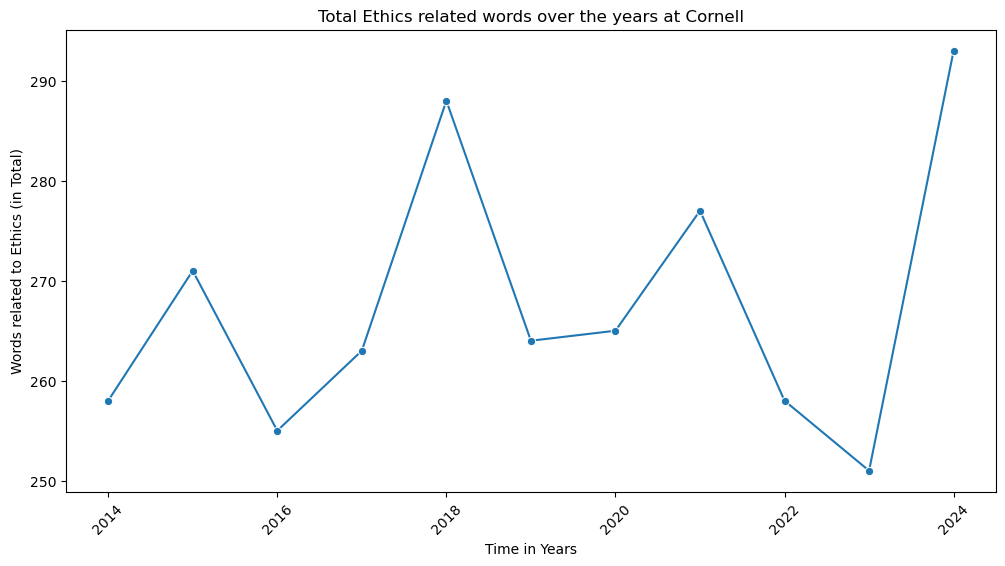

In [158]:
# Group data by Year and calculate the total KeyBERTCountFinal
total_counts_over_time = final_df_analyis_ethics.groupby('Year')['KeyBERTEthics'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='KeyBERTEthics', data=total_counts_over_time, marker='o')
plt.title('Total Ethics related words over the years at Cornell')
plt.xlabel('Time in Years')

plt.ylabel('Words related to Ethics (in Total)')
plt.xticks(rotation=45)
plt.show()

#  Visualization of associated keywords across Disciplines over Time

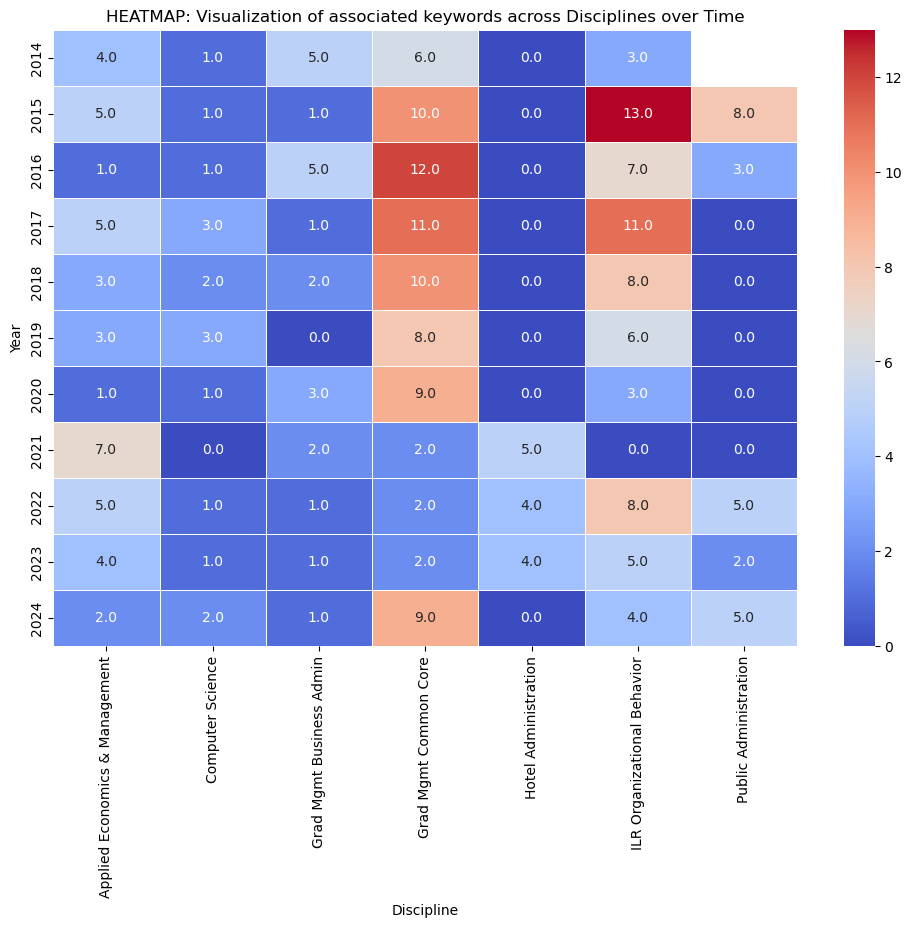

In [159]:
selected_subjects = ['AEM', 'NBA','NCC', 'HADM', 'PADM','ILROB','CS']

# Filter the DataFrame to include only selected disciplines
filtered_df = final_df_analyis_ethics[final_df_analyis_ethics['Subject'].isin(selected_subjects)]
# Pivot the filtered data to create a heatmap
heatmap_data = filtered_df.pivot_table(index='Year', columns='SubjectLongForm', values='KeyBERTEthics', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
plt.title('HEATMAP: Visualization of associated keywords across Disciplines over Time')
plt.xlabel('Discipline')
plt.ylabel('Year')
plt.show()

# Line Graph for Ethics keywords count for Descipline over time

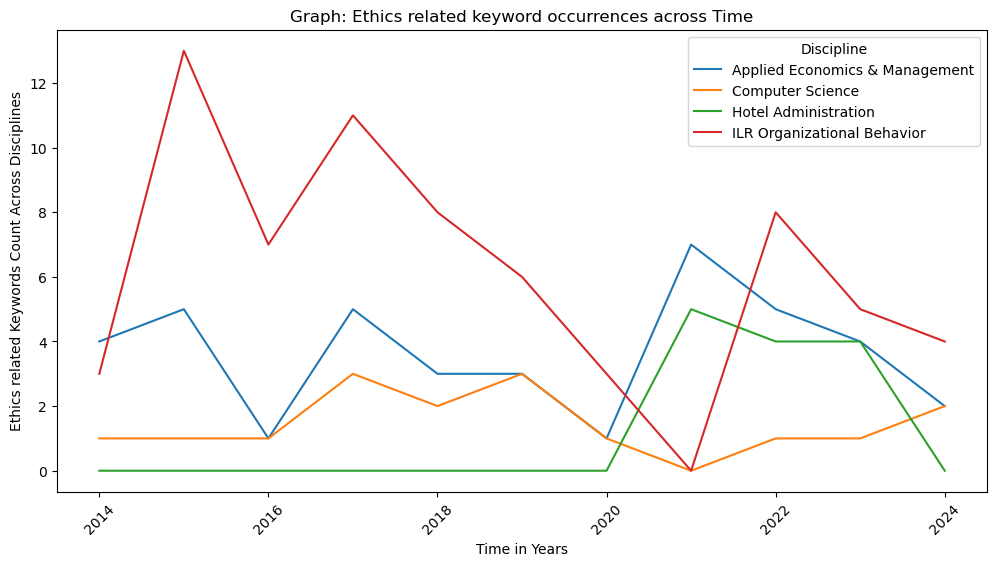

In [160]:
# List of specific disciplines you want to include
selected_disciplines = ['Hotel Administration',
                        'Applied Economics & Management','ILR Organizational Behavior',
                        'Computer Science']

# Filter the DataFrame to include only specific disciplines
avg_counts_by_discipline = final_df_analyis_ethics[final_df_analyis_ethics['SubjectLongForm'].isin(selected_disciplines)]

# Create a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='KeyBERTEthics', hue='SubjectLongForm', data=avg_counts_by_discipline)
plt.title('Graph: Ethics related keyword occurrences across Time')
plt.xlabel('Time in Years')
plt.ylabel('Ethics related Keywords Count Across Disciplines')
plt.xticks(rotation=45)
plt.legend(title='Discipline')
plt.show()

# Line Graph for Ethics keywords count for Descipline over time (Added the NoOfClasses to get the actual analysis)

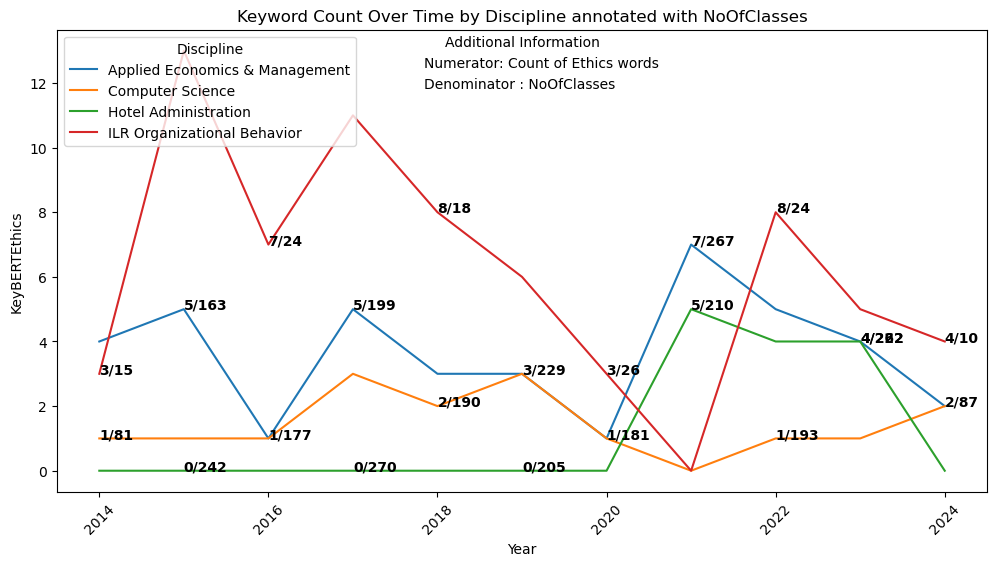

In [161]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='KeyBERTEthics', hue='SubjectLongForm', data=avg_counts_by_discipline)

# Annotate points
for i, row in avg_counts_by_discipline.iterrows():
    if i%2==1:
        plt.text(row['Year'], row['KeyBERTEthics'], f"{row['KeyBERTEthics']}/{row['NoOfClasses']}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Keyword Count Over Time by Discipline annotated with NoOfClasses')
plt.xlabel('Year')
plt.ylabel('KeyBERTEthics')
plt.xticks(rotation=45)
original_legend  = plt.legend(title='Discipline',loc='upper left')
# Create custom legend entries
custom_entry1 = mpatches.Patch(color='none', label='Numerator: Count of Ethics words')
custom_entry2 = mpatches.Patch(color='none', label='Denominator : NoOfClasses')

# Create custom legend
custom_legend = plt.legend(handles=[custom_entry1, custom_entry2], 
                           loc='upper center', 
                           title='Additional Information', 
                           borderaxespad=0, 
                           frameon=False)

# Add the custom legend to the plot
plt.gca().add_artist(original_legend)
plt.show()

#  Bubble Chart to analysize the 3 dimensions of Data 


## Dimension 1 : Group by Subject & Year

## Dimension 2 : Count of Ethics related words  (Size of Bubble)


## Dimension 3 : No of Classes (Color of Bubble)


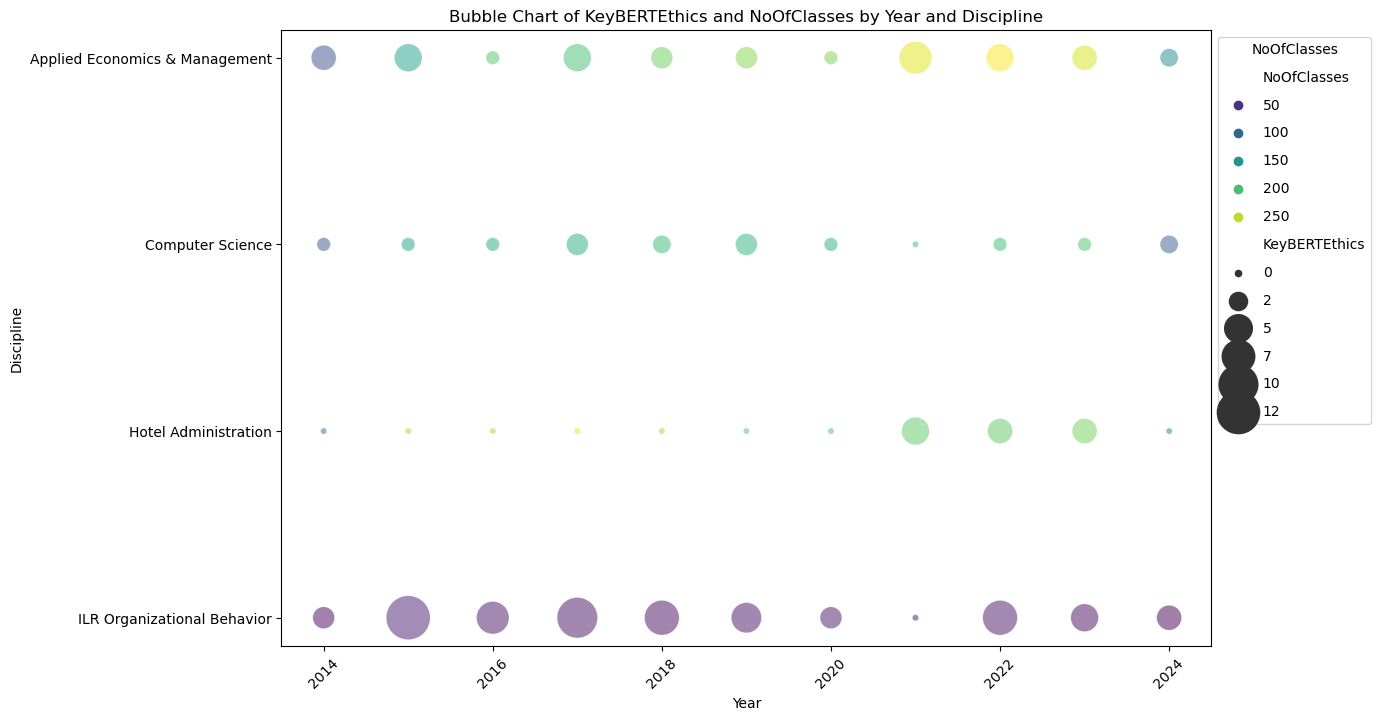

In [162]:
# Grouping and aggregating the data
bubble_data = avg_counts_by_discipline.groupby(['Year', 'SubjectLongForm']).agg({'KeyBERTEthics': 'sum', 'NoOfClasses': 'sum'}).reset_index()

# Creating the bubble chart
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(data=bubble_data, x='Year', y='SubjectLongForm', size='KeyBERTEthics', hue='NoOfClasses', sizes=(20, 1000), alpha=0.5, palette='viridis')

# Adding titles and labels
plt.title('Bubble Chart of KeyBERTEthics and NoOfClasses by Year and Discipline')
plt.xlabel('Year')
plt.ylabel('Discipline')
plt.xticks(rotation=45)
bubble_plot.legend(title='NoOfClasses', labelspacing=1, bbox_to_anchor=(1, 1))
plt.show()
